# VAR/SVAR 模型相關程式

### 簡要Summary

* 編號：v5i5l4

1. 5個變數：隔夜拆款利率、許可建照數、消費者購屋貸款、情緒指數、房價指數

2. Lag = 4

3. normal seed 394805

$$
\left[
\begin{array}{c}
	\varepsilon_t^i\\
	\varepsilon_t^{permit}\\
	\varepsilon_t^{loan}\\
    \varepsilon_t^{sentiment}\\
	\varepsilon_t^{hp}
\end{array}
\right]
=
\left[
\begin{array}{ccccc}
a_{11} &0 &0 &0 &0\\
a_{21} &a_{22} &0 &0 &0\\
a_{31} &0 &a_{33} &0 &a_{35}\\
0 &a_{42} &a_{43} &a_{44} &a_{45}\\
a_{51} &a_{52} &a_{53} &a_{54} &a_{55}
\end{array}
\right]
\left[
\begin{array}{c}
	e_t^{mp}\\
	e_t^{hs}\\
	e_t^{hd}\\
    e_t^{expectation}\\
	e_t^{sp}
\end{array}
\right]
$$

### 環境設定

In [1]:
# 設定路徑
#Path = "/Users/Andy 1/Google 雲端硬碟 (r08323004@g.ntu.edu.tw)/0 Semesters/Thesis/6_VAR_model/R"
#setwd(Path)
source("code/VAR_functions.R")           # 讀取 VARsource.R 檔

#inv_tol = 1e-20 #求反矩陣時做數值運算允許的最小誤差(避免singular matrix)
inv_tol = 1e-22

─ Attaching packages ──────────────────── tidyverse 1.3.0 ─

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

─ Conflicts ───────────────────── tidyverse_conflicts() ─
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::mutate()    masks plyr::mutate()
✖ dplyr::rename()    masks plyr::rename()
✖ dplyr::summarise() masks plyr::summarise()
✖ dplyr::summarize() masks plyr::summarize()

Loading required package: matrixcalc

Loading required package: lattice



In [2]:
options(warn=-1)    # 關掉warning
#options(warn=0)
options(scipen=999) #不要科學記號

### 讀資料

In [3]:
###### 讀取資料 ######
file = "data/df.csv"
data = read.csv(file = file, header = TRUE)
data = na.omit(data)
# 5-variable model
By <- data %>% select(interest_rate, permit, loan, Sentiment, hp) %>% as.matrix

### 模型設定

In [4]:
#----- 模型設定 -----#
VAR.P = 2                       # 最大的落後項數
CONST = TRUE                    # 是否有常數項
Y     = VAR.Y(By, VAR.P)        # 設定 Y
X     = VAR.X(By, VAR.P)        # 設定 X

## Reduced Form VAR

In [5]:
###### 參數估計 ######
(Coef.OLS    = VAR.OLS(Y, X, CONST)                  )
(Sigma.OLS   = VAR.Sigma.OLS(Y, X, Coef.OLS, CONST)  )
(Sigma.MLE   = VAR.Sigma.MLE(Y, X, Coef.OLS, CONST))

0.722058306,-0.0000077344149,0.000000277829897,16.1278619,0.00115407408,0.192222893,-0.000007395526,-0.000000363082461,5.9359668,0.00325782519,0.04130478
406.930007871,0.6041224972876,-0.000687786593161,35859.9555542,60.18088222401,-626.672038325,0.257607672938,0.000415937819106,-34545.4403102,-50.08258361152,3159.17262729
13805.983050834,12.1399842546161,1.623707737356170,3512646.8905859,930.14846058772,-18184.914874524,-8.019444910227,-0.621095069333307,-2128914.0580230,-988.58868179843,-1386.72599387
-0.001503781,0.0000003946027,0.000000008809227,0.6282233,-0.00007606962,0.001107574,0.000000117841,-0.000000008071463,-0.1146121,0.00002357842,0.00437145
-0.476922612,0.0001058876296,-0.000002792079375,65.0077335,1.27415504650,-0.135157323,0.000369176349,0.000003365392898,-152.3861634,-0.31222660761,0.54451478


0.2069104800,7.009556,2700.39882,0.00038324280,0.014924823
7.0095563051,1237954.623902,8541160.74626,1.10909919865,1145.978383741
2700.3988195915,8541160.746259,5136722121.20931,25.08305540896,-4208.777428270
0.0003832428,1.109099,25.08306,0.00002686865,0.008086113
0.0149248230,1145.978384,-4208.77743,0.00808611312,12.699964384


0.1874573580,6.350538,2446.51517,0.00034721142,0.01352163
6.3505381909,1121565.727638,7738145.63336,1.00482491501,1038.23682630
2446.5151698863,7738145.633363,4653782434.59989,22.72481943034,-3813.08040510
0.0003472114,1.004825,22.72482,0.00002434254,0.00732588
0.0135216345,1038.236826,-3813.08041,0.00732588026,11.50595064


### AIC/SIC

In [6]:
#----- 資訊準則 -----#
A0.Mat = matrix(1, 3, 7)
(SIC = VAR.IC(Sigma.MLE, A0.Mat, T)$SIC              )

(IC = VAR.Select(By, Max.lag = 4, CONST)             )
apply(IC, 1, which.min)

[1] 25.97448

AIC,27.54207,26.91465,26.91336,26.83078
SIC,28.24648,28.21311,28.81238,29.33702
HQ,27.82808,27.44181,27.68425,27.84805


AIC SIC  HQ 
  4   2   2

In [7]:
# 選擇lag期數
VAR.P = 4

# SVAR

## Identification

$$
\left[
\begin{array}{c}
	\varepsilon_t^i\\
	\varepsilon_t^{permit}\\
	\varepsilon_t^{loan}\\
    \varepsilon_t^{sentiment}\\
	\varepsilon_t^{hp}
\end{array}
\right]
=
\left[
\begin{array}{ccccc}
a_{11} &0 &0 &0 &0\\
a_{21} &a_{22} &0 &0 &0\\
a_{31} &0 &a_{33} &0 &a_{35}\\
0 &a_{42} &a_{43} &a_{44} &a_{45}\\
a_{51} &a_{52} &a_{53} &a_{54} &a_{55}
\end{array}
\right]
\left[
\begin{array}{c}
	e_t^{mp}\\
	e_t^{hs}\\
	e_t^{hd}\\
    e_t^{expectation}\\
	e_t^{sp}
\end{array}
\right]
$$

In [8]:
### 5-variable model
# 如果不是Wold遞迴式 -> 自定義
Amat = diag(5)
Amat[2,1]  = NA;
Amat[3,1]  = NA; Amat[3,5]  = NA;
Amat[4,2]  = NA; Amat[4,3]  = NA; Amat[4,5]  = NA;
Amat[5,1]  = NA; Amat[5,2]  = NA; Amat[5,3]  = NA; Amat[5,4]  = NA;

Bmat = diag(5)
diag(Bmat) = NA

Amat;Bmat

1,0,0,0,0
NA,1,0,0,0
NA,0,1,0,NA
0,NA,NA,1,NA
NA,NA,NA,NA,1


NA,0,0,0,0
0,NA,0,0,0
0,0,NA,0,0
0,0,0,NA,0
0,0,0,0,NA


## 估計 $\hat{A} , \hat{B}$

### 1. 找起始值

為了得到合理的估計，在設定完認定條件後，依以下步驟蒐集seeds:

1. 給定一個seed，估 $\hat{A} , \hat{B}$ ，從normal或uniform隨機assign起始值

2. 如果 $se(\hat{A}), se(\hat{B})$ 存在，進入下一步，若否則回到第一步

3. 如果標準誤都小於2500，則存下這個seed

4. 直到存的seed總數大於100則迴圈終止

```R
### Brutal Force
seed_stored <- c()
seed_counter <- 0
i <- 45354
while(TRUE){
    i <- i+1
    set.seed(i)
    SVAR_AB_est <- try(VAR.svarest.AB(By, VAR.P, Amat, Bmat, CONST, start = "normal"), 
                     silent = TRUE)
    
    if(class(SVAR_AB_est)=="try-error"){
        next
    }else{
        A0.Std <- SVAR_AB_est$A0.Std
        B0.Std <- SVAR_AB_est$B0.Std
    }
        
    if(sum(is.na(A0.Std))==0 && sum(is.na(B0.Std))==0){
        seed_stored <- rbind(seed_stored, i)
        cat("Seed: ", i, " found\n")
        write.csv(seed_stored, "seedv5i5-norm.csv")
        
        # 把Variance Decomp的table畫出來
        SVAR_AB_IRF <- VAR.svarirf.AB(By, VAR.P, Amat, Bmat, h = 119, CONST, SVAR_AB_est = SVAR_AB_est)
        SVAR_AB_VarDecomp <- VAR.svardecomp.AB(m = 5, By, VAR.P,
                                         AMat, BMat, h=119,
                                         Const=TRUE, ddTheta = SVAR_AB_IRF)
          if(sum((SVAR_AB_VarDecomp*100)>90)>0){ #如果變異數分解的情況夠好就印出來
              next
          }else{
              cat("Now in seed: ", file = "output_v5i5.txt",append = T);
              cat(i, file = "output_v5i5.txt", append = T)
              cat("\n\n", file = "output_v5i5.txt", append = T)
              cat(SVAR_AB_VarDecomp*100, file = "output_v5i5.txt", append = T)
              cat("\n\n", file = "output_v5i5.txt", append = T)
              seed_counter <- seed_counter+1
  }
    }
    if(seed_counter>=1000){
        break
  }
#   cat("Now in teration: ", i, "\n",
#       "There are ", length(seed_stored), " seeds found", "\n")
}
```

### 2. 比標準誤大小

以下的程式可以從上面存下的seeds中計算出每個seed對應的 $\hat{A}, \hat{B}$ 的標準誤大小

### 3. 從變異數分解看Possible Seed

但標準誤小不見得就可以有好的估計的結果

下面的程式可以從已存下的seeds一個個輸出變異數分解的結果至一個純文字檔中

# 找到的seed

從 uniform(-10,10) 抽出的好的seed:

311, 3227, 9176, 15848, 25581, 30714, 51517, 63129, 72757, 78156, 87802, 132505, 145176, 149853, 160493, 1319046, 232100, 1311963, 

* 50613, 92746, 130215, 145887

* 162066

In [9]:
set.seed(394805)
rnorm(15)

[1]  0.0007308481 -0.8181600840  0.1845662701 -1.0289560205  0.8817788096
 [6]  1.3647435471 -1.7156191821 -0.5393558260  1.4014265700  2.1688824973
[11]  0.1908454930 -0.7190647816  0.3566566119  1.0454598785 -0.5329368629

In [10]:
set.seed(394805)
SVAR_AB_est <- VAR.svarest.AB(By, VAR.P, Amat, Bmat, CONST, start = "normal")
A0 <- SVAR_AB_est$A0.svar
B0 <- SVAR_AB_est$B0.svar
A0.Std <- SVAR_AB_est$A0.Std
B0.Std <- SVAR_AB_est$B0.Std

## A, B Matrix

In [11]:
A0; B0
A0.Std; B0.Std

1.00000,0.00000000,0.00000000000,0.0,0.000
-449.66104,1.00000000,0.00000000000,0.0,0.000
-3282.44480,0.00000000,1.00000000000,0.0,-2953.888
0.00000,-12.59655877,-0.00906551595,1.0,5596.908
53.84426,0.06344505,0.00009525535,-54282.9,1.000


0.4560288,0.000,0.00,0.00,0.0000
0.0000000,650.261,0.00,0.00,0.0000
0.0000000,0.000,26603.39,0.00,0.0000
0.0000000,0.000,0.00,19385.22,0.0000
0.0000000,0.000,0.00,0.00,340.4011


0.00000,0.00000000,0.0000000000,0.000000,0.0000
147.21211,0.00000000,0.0000000000,0.000000,0.0000
9818.00239,0.00000000,0.0000000000,0.000000,851.8368
0.00000,10.54099725,0.0349743153,0.000000,3116.5832
78.76799,0.03249458,0.0004675557,0.139901,0.0000


0.035278,0.00000,0.0000,0.00,0.00000
0.000000,24.99485,0.0000,0.00,0.00000
0.000000,0.00000,563.7797,0.00,0.00000
0.000000,0.00000,0.0000,10442.86,0.00000
0.000000,0.00000,0.0000,0.00,31.76192


## IRF (without Bootstrap C.I.)

In [12]:
### IRF
SVAR_AB_IRF <- VAR.svarirf.AB(By, VAR.P, Amat, Bmat, h = 119, CONST, SVAR_AB_est = SVAR_AB_est)


# 5*5個圖的time series
df_IRF_plot <- matrix(NA, 120, 25) #%>% as.tibble()
#dim(df_IRF_plot)
h <- 0 # h表示第幾期的IRF
for(period in SVAR_AB_IRF){
  k <- 0 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
  h <- h+1 # h表示第幾期的IRF
  for(j in 1:5){
    for(i in 1:5){
      k <- k+1 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
      df_IRF_plot[h,k] <- period[i,j]
    }
  }
}
df_IRF_plot <- df_IRF_plot %>% as_tibble()

In [13]:
p1 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V1))
p2 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V2))
p3 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V3))
p4 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V4))
p5 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V5))
p6 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V6))
p7 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V7))
p8 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V8))
p9 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V9))
p10 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V10))
p11 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V11))
p12 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V12))
p13 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V13))
p14 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V14))
p15 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V15))
p16 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V16))
p17 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V17))
p18 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V18))
p19 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V19))
p20 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V20))
p21 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V21))
p22 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V22))
p23 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V23))
p24 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V24))
p25 <- ggplot(df_IRF_plot) + geom_line(aes(x = 1:nrow(df_IRF_plot), y = V25))

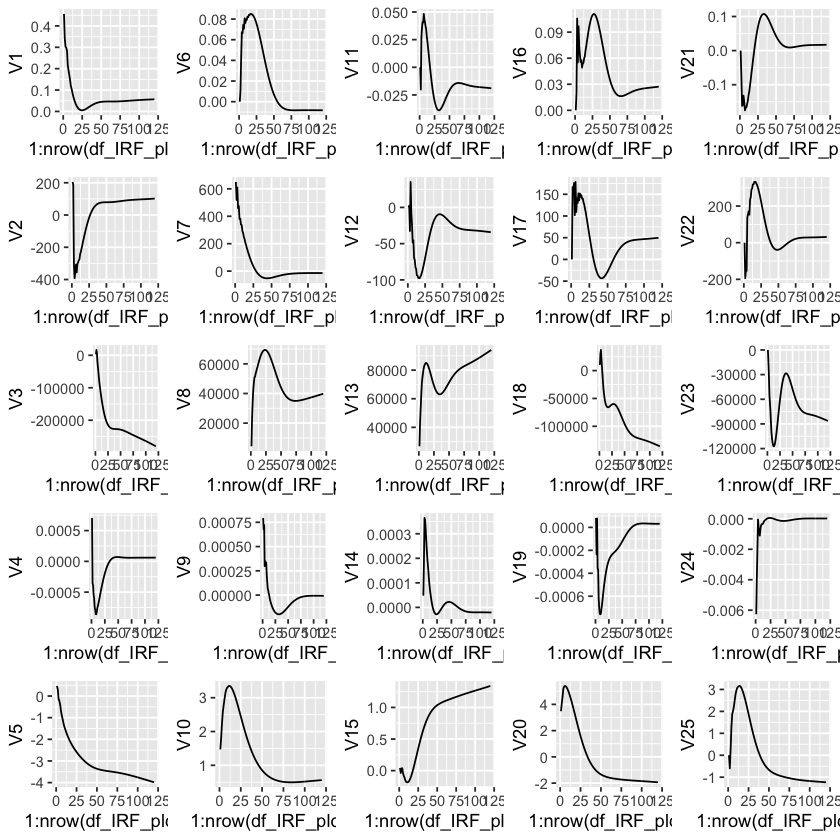

In [14]:
multiplot(p1,p2,p3,p4,p5,
          p6,p7,p8,p9,p10,
          p11,p12,p13,p14,p15,
          p16,p17,p18,p19,p20,
          p21,p22,p23,p24,p25,
          cols = 5)

```R
# For shock 1
multiplot(p1,p2,p3,p4,p5,
          cols = 2)
# For shock 2
multiplot(p6,p7,p8,p9,p10,
          cols = 2)
# For shock 3
multiplot(p11,p12,p13,p14,p15,
          cols = 2)
# For shock 4
multiplot(p16,p17,p18,p19,p20,
          cols = 2)
# For shock 5
multiplot(p21,p22,p23,p24,p25,
          cols = 2)
```

## IRF (Bootstrap C.I.)

Steps:

1. 從殘差取後放回重抽T個

2. 從估計值加上重抽的T個殘差，得到5條 period為T的pseudo time series

3. 從pseudo time series再估SVAR及IRF

    a. 估的時候是固定已經得到的 $\hat{A}, \hat{B}$ matrix來計算IRF
    
    b. 估的條件相似，是當重抽一組residual並得到pseudo time series後，一樣要 $se(\hat{A}), se(\hat{B})$ 存在才算進一個bootstrap statistics
    
    c. 停止條件是蒐集到1000條

4. 從IRF的2.5% quantile跟97.5%quantile找到IRF的95% C.I.

存法：用arrary：

1. row數為總期間減去lag期數

2. column數為變數總數的平方（shock1對y1,..., shock5對y5）

3. page數為Bootstrap重複的次數

In [15]:
#```R
lower = 0.025                                        # 控制成 95% CI
upper = 1-lower
kk = ncol(By)
ddY = VAR.ddY(By, VAR.P)
ddX = VAR.ddX(By, VAR.P)

# dim(ddY); dim(ddX)

T   = nrow(ddY)
T.total= nrow(By)
Ik  = diag(rep(1, kk))
# 16 coef if 4 variables; 55 coef if 5 variables
Coef = t(VAR.EbyE(ddY, ddX, CONST)$ddA)              # Step 1 估計模型
# residuals
U    = VAR.EbyE(ddY, ddX, CONST)$ddU
BSigma.u = VAR.ddSigma.OLS(ddY, ddX, CONST)
if(CONST == TRUE){
  const = Coef[, ncol(Coef)]
  Coef.noc= Coef[,-ncol(Coef)]                      # 刪掉 const
}else{
  const = matrix(0, kk, 1)
  Coef.noc = Coef
}

Theta.unit= VAR.Theta(Coef, h, BSigma.u, CONST)$unit # 估算 Theta.unit
Theta.std = VAR.Theta(Coef, h, BSigma.u, CONST)$std  # 估算 Theta.std

# dm.U <- U-mean(U)
dm.U <- U

N = 1000 #重抽次數
Theta.unit.sim = vector("list", N)
Theta.std.sim  = vector("list", N)

dim(ddX); dim(Coef.noc); dim(dm.U)


# 存N次重抽的IRF
df_IRF.sim <- array(NA, c(120,kk^2,N)) #dimensions are: Time Period, Number of shock interacts with variables, page (number of Bootstrap resamplings)
counter <- 1
while(TRUE){

  #cat("Now, there are ", counter-1, " sets of resamples.\n")
  Y.sim = matrix(0, nrow = T.total, ncol = kk)          # Y.sim = 0 #pseudo time series
  Y.sim[c(1:VAR.P),] = By[c(1:VAR.P), ] #initial values

  boot.number = sample(c(1:T), replace = TRUE)      # Step 3 取出放回
  U.sim = dm.U[boot.number,]

    # predicted values given the above initial values
    last.y= c(t(By[VAR.P:1,]))
    for(ii in 1:T){
         last.y = last.y[1:(kk*VAR.P)]
         Y.sim[ii+VAR.P, ] = Coef.noc %*% last.y + const + U.sim[ii,]      # Step 4 模擬資料
         last.y = c(Y.sim[ii+VAR.P,], last.y)
      }
  
#   Y.sim[-c(1:VAR.P),] <- matrix(const, nrow = T.total-VAR.P, ncol = kk, byrow = T) + ddX %*% t(Coef.noc) + U.sim
  
    
  #`Y.sim` is the pseudo time series
  # Step 5 重新估算SVAR
  
  ### SVAR.sim Start ###

    Y_pseudo     = VAR.Y(Y.sim, VAR.P)        # 設定 Y
    X_pseudo     = VAR.X(Y.sim, VAR.P)        # 設定 X
    Coef.OLS_pseudo    = VAR.OLS(Y_pseudo, X_pseudo, CONST)
    Sigma.OLS_pseudo   = VAR.Sigma.OLS(Y_pseudo, X_pseudo, Coef.OLS_pseudo, CONST)
    C.Prime_pseudo <- chol(Sigma.OLS_pseudo)
    C_pseudo <- t(C.Prime_pseudo)
    B0_pseudo <- diag(diag(C_pseudo), ncol = 5, nrow = 5)
    A0_pseudo <- B0_pseudo %*% solve(C_pseudo)
    SVAR_AB_est.sim <- list("A0.svar" = A0_pseudo, "B0.svar" = B0_pseudo)
    SVAR_AB_IRF.sim <- VAR.svarirf.AB(Y.sim, VAR.P, Amat, Bmat, h = 119, CONST, SVAR_AB_est = SVAR_AB_est)#.sim)
    
  # 5*5個圖的time series
  df_IRF_plot.sim <- matrix(NA, 120, kk^2) #%>% as.tibble()
  # df_IRF.sim <- array(1:(120*25*N), c(120,25,N))
  # df_IRF.sim[2,1,1] # slicing
  
  h <- 0 # h表示第幾期的IRF
  for(period in SVAR_AB_IRF.sim){
    k <- 0 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
    h <- h+1 # h表示第幾期的IRF
    for(j in 1:kk){
      for(i in 1:kk){
        k <- k+1 # k表示把5*5的矩陣攤平到25個col的df時，要攤到第幾個columns上
        df_IRF_plot.sim[h,k] <- period[i,j]
      }
    }
  }
  # 把這一次重抽得到的IRF append進`df_IRF.sim`中
  df_IRF.sim[,,counter] <- df_IRF_plot.sim
  ### SVAR.sim Ends ###
  if(counter>=N){
    break
  }
  counter <- counter+1
}
#```

[1] 115  20

[1]  5 20

[1] 115   5

In [16]:
#```R
# Save
saveRDS(df_IRF.sim, file = "df_IRF.sim_v5i5l4.rds")
#```

In [17]:
df_IRF.sim <- read_rds("df_IRF.sim_v5i5l4.rds")

In [18]:
# 看某一頁
head(df_IRF.sim[,,1000])

0.45602875,205.0584,2873.888,0.0007056436,0.4661649,-0.0000000000000001759505,650.2610,4343.785,0.00079472790,1.470531,⋯,0.00000000,-0.0000000000001201328,10280.15,0.00008215198,3.480209,0.0000000,-0.00000000000000000005507824,0.003325498,-0.0062708710,0.000001125803
0.37610595,409.9786,3923.816,-0.0008704680,-0.3237236,0.0380697130677632375462,488.8586,23899.514,0.00089032432,2.107097,⋯,0.03768335,245.9039517243201657948,29047.29,0.00044116399,3.657542,-0.0526963,-255.22894496966691235684265848,-9854.917176833,-0.0036038918,-1.425812121307
0.28398716,-315.5339,-11495.123,-0.0016721201,-0.9861239,0.0882235905441911272273,679.9327,33981.647,0.00169994140,2.622417,⋯,0.13289543,503.1460374188253581451,32490.10,0.00196383476,4.616377,-0.1431848,-170.51927209746364155762421433,-25143.649943751,-0.0006672173,-0.527526431190
0.19484331,-469.0113,-60394.762,-0.0023190283,-1.8673502,0.1587612521984618496607,519.6042,48668.966,0.00060692384,3.071323,⋯,0.17231689,589.0318689305490806873,29585.25,0.00096541728,5.624620,-0.1222552,-144.40647556401265205749950837,-41681.831867058,0.0003382381,0.898365999792
0.15595842,-489.9827,-93187.968,-0.0022385272,-2.2904899,0.1628911284741778320306,468.5404,55776.410,0.00038194572,3.088398,⋯,0.21432043,462.5326935024509111827,29465.52,0.00051059620,5.246659,-0.1094802,70.45252386571340252885420341,-49959.875298928,-0.0001100576,1.008458538901
0.01546754,-307.7304,-118530.234,-0.0020824514,-2.2298067,0.1734585350338693765515,263.5939,61770.196,-0.00006817661,3.114766,⋯,0.20558944,367.3267579933576030271,23520.57,-0.00030744506,4.996290,-0.1073067,89.84567487525235662815248361,-54932.551848443,-0.0005794396,1.126651572137


### 畫IRF & Bootstrap C.I.

In [19]:
df_IRF_plot.BS.L <- matrix(NA, 120, 25)
df_IRF_plot.BS.U <- matrix(NA, 120, 25)
df_IRF_plot.BS.Median <- matrix(NA, 120, 25)
df_IRF_plot.BS.Mean <- matrix(NA, 120, 25)
for(col in 1:25){
  for(row in 1:120){
    df_IRF_plot.BS.L[row,col] <- quantile(df_IRF.sim[row,col,], probs = 0.025)
    df_IRF_plot.BS.U[row,col] <- quantile(df_IRF.sim[row,col,], probs = 0.975)
    df_IRF_plot.BS.Median[row,col] <- quantile(df_IRF.sim[row,col,], probs = 0.5)
    df_IRF_plot.BS.Mean[row,col] <- mean(df_IRF.sim[row,col,])
  }
}

df_IRF_plot.BS.L <- df_IRF_plot.BS.L %>% as_tibble()
df_IRF_plot.BS.U <- df_IRF_plot.BS.U %>% as_tibble()
df_IRF_plot.BS.Median <- df_IRF_plot.BS.Median %>% as_tibble()
df_IRF_plot.BS.Mean <- df_IRF_plot.BS.Mean %>% as_tibble()

In [20]:
ind <- 0
for(i in 1:5){
  for(j in 1:5){
    ind <- ind+1
    nam <- paste("shock", j, "y", i, sep = '')
    assign(nam, bind_cols(df_IRF_plot.BS.L[ind], df_IRF_plot.BS.U[ind],
                          df_IRF_plot.BS.Median[ind], df_IRF_plot.BS.Mean[ind],
                          df_IRF_plot[ind]))
    # 改名
    evalStr <- paste0("colnames(", nam, ") <- c('Lower', 'Upper', 'Median', 'Mean', 'Actual')")
    eval(parse(text=evalStr))
    # 圖層
    evalStr <- paste0("p", ind, " <- ", "ggplot(",nam,") +geom_hline(yintercept=0, color = 'grey')+ geom_line(aes(x = 1:nrow(", nam, "), y = Lower), linetype = 'dashed', col='red')+geom_line(aes(x = 1:nrow(", nam, "), y = Upper), linetype = 'dashed', col='red')+geom_line(aes(x = 1:nrow(", nam, "), y = Actual), col = 'Blue')")
    eval(parse(text=evalStr))
  }
}

New names:
* V1 -> V1...1
* V1 -> V1...2
* V1 -> V1...3
* V1 -> V1...4
* V1 -> V1...5

New names:
* V2 -> V2...1
* V2 -> V2...2
* V2 -> V2...3
* V2 -> V2...4
* V2 -> V2...5

New names:
* V3 -> V3...1
* V3 -> V3...2
* V3 -> V3...3
* V3 -> V3...4
* V3 -> V3...5

New names:
* V4 -> V4...1
* V4 -> V4...2
* V4 -> V4...3
* V4 -> V4...4
* V4 -> V4...5

New names:
* V5 -> V5...1
* V5 -> V5...2
* V5 -> V5...3
* V5 -> V5...4
* V5 -> V5...5

New names:
* V6 -> V6...1
* V6 -> V6...2
* V6 -> V6...3
* V6 -> V6...4
* V6 -> V6...5

New names:
* V7 -> V7...1
* V7 -> V7...2
* V7 -> V7...3
* V7 -> V7...4
* V7 -> V7...5

New names:
* V8 -> V8...1
* V8 -> V8...2
* V8 -> V8...3
* V8 -> V8...4
* V8 -> V8...5

New names:
* V9 -> V9...1
* V9 -> V9...2
* V9 -> V9...3
* V9 -> V9...4
* V9 -> V9...5

New names:
* V10 -> V10...1
* V10 -> V10...2
* V10 -> V10...3
* V10 -> V10...4
* V10 -> V10...5

New names:
* V11 -> V11...1
* V11 -> V11...2
* V11 -> V11...3
* V11 -> V11...4
* V11 -> V11...5

New names:
* V12 -> V12

In [21]:
Text_Size_Theme = theme(
  axis.title.x = element_text(size = 12),
  axis.text.x = element_text(size = 12),
  axis.title.y = element_text(size = 12),
  axis.title = element_text(size = 12),
  plot.title = element_text(size=12))

## shock1
p1 <- p1+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Monetary Policy Shock')+Text_Size_Theme
p2 <- p2+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Monetary Policy Shock')+Text_Size_Theme
p3 <- p3+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Loan to Monetary Policy Shock')+Text_Size_Theme
p4 <- p4+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Sentiment Index to Monetary Policy Shock')+Text_Size_Theme
p5 <- p5+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Monetary Policy Shock')+Text_Size_Theme

## shock2
p6 <- p6+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Housing Supply Shock')+Text_Size_Theme
p7 <- p7+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Housing Supply Shock')+Text_Size_Theme
p8 <- p8+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Loan to Housing Supply Shock')+Text_Size_Theme
p9 <- p9+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Sentiment Index to Housing Supply Shock')+Text_Size_Theme
p10 <- p10+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Housing Supply Shock')+Text_Size_Theme

## shock3
p11 <- p11+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Housing Demand Shock')+Text_Size_Theme
p12 <- p12+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Housing Demand Shock')+Text_Size_Theme
p13 <- p13+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Loan to Housing Demand Shock')+Text_Size_Theme
p14 <- p14+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Sentiment Index to Housing Demand Shock')+Text_Size_Theme
p15 <- p15+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Housing Demand Shock')+Text_Size_Theme

## shock4
p16 <- p16+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Housing Price Expectation Shock')+Text_Size_Theme
p17 <- p17+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Housing Price Expectation Shock')+Text_Size_Theme
p18 <- p18+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Loan to Housing Price Expectation Shock')+Text_Size_Theme
p19 <- p19+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Sentiment Index to Housing Price Expectation Shock')+Text_Size_Theme
p20 <- p20+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Housing Price Expectation Shock')+Text_Size_Theme

## shock5
p21 <- p21+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Interest Rate to Housing Speculation Shock')+Text_Size_Theme
p22 <- p22+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Permit to Housing Speculation Shock')+Text_Size_Theme
p23 <- p23+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Loan to Housing Speculation Shock')+Text_Size_Theme
p24 <- p24+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Sentiment Index to Housing Speculation Shock')+Text_Size_Theme
p25 <- p25+labs(x = 'Time (Season)',
        y = '',
        title = 'Response of Housing Price to Housing Speculation Shock')+Text_Size_Theme

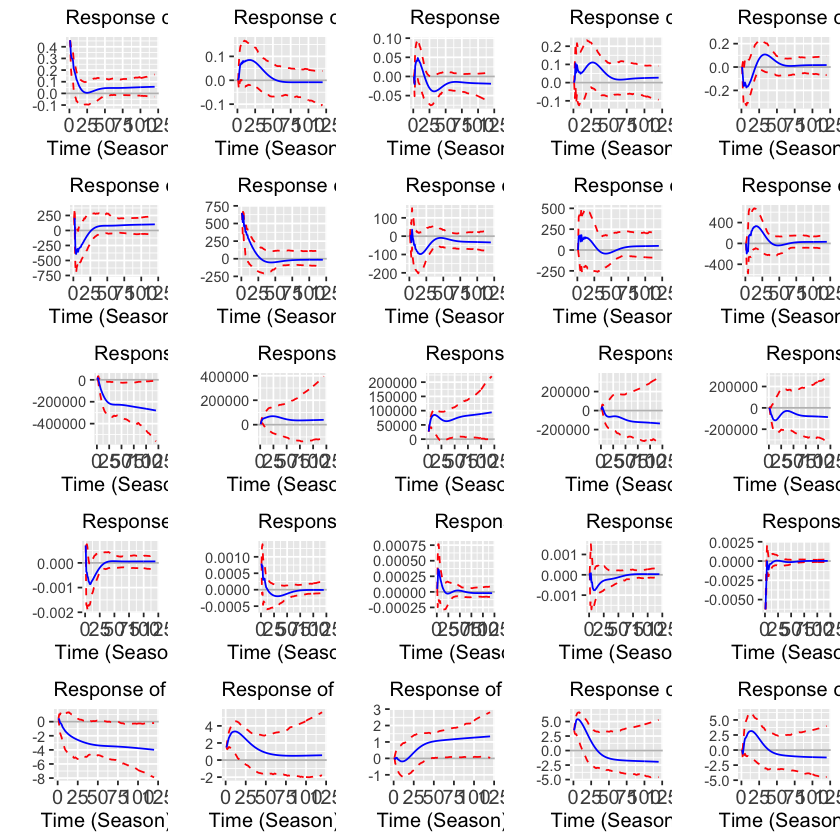

In [22]:
multiplot(p1,p2,p3,p4,p5,
          p6,p7,p8,p9,p10,
          p11,p12,p13,p14,p15,
          p16,p17,p18,p19,p20,
          p21,p22,p23,p24,p25,
          cols = 5)

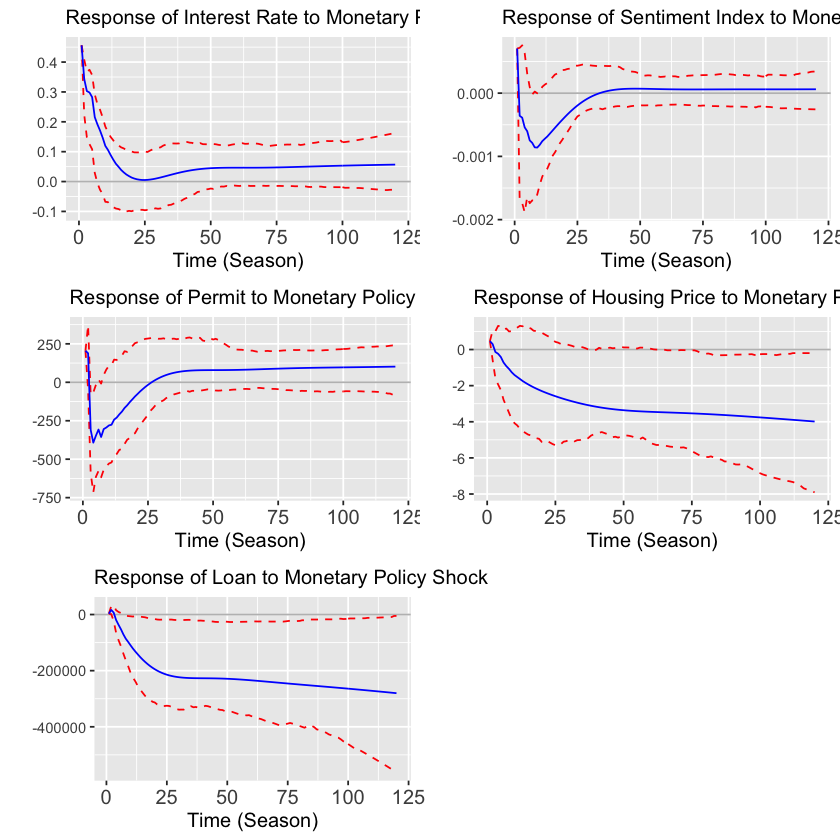

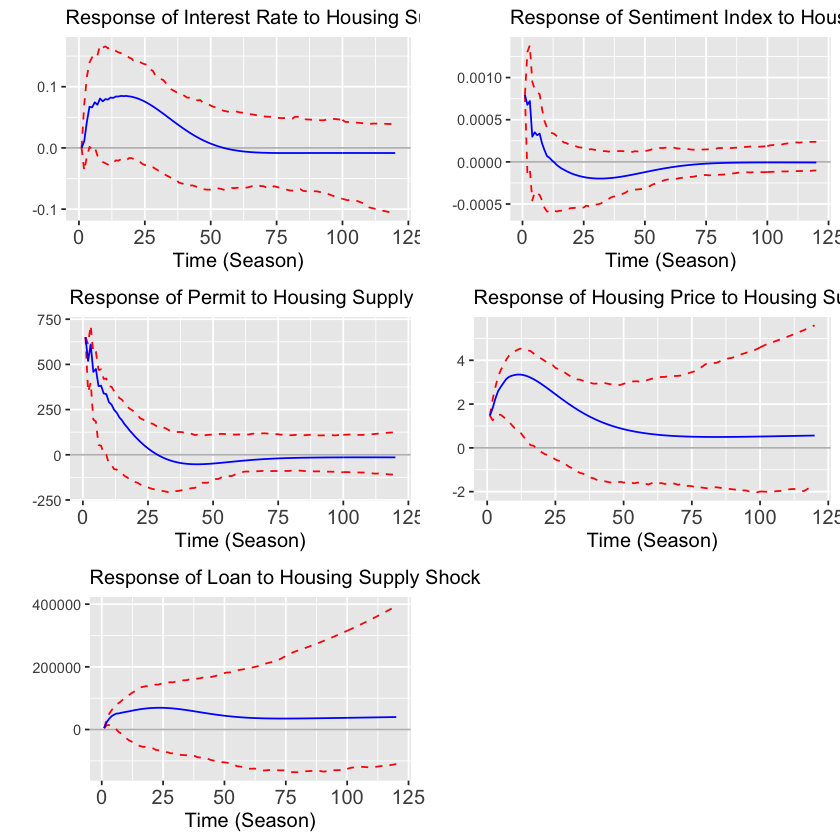

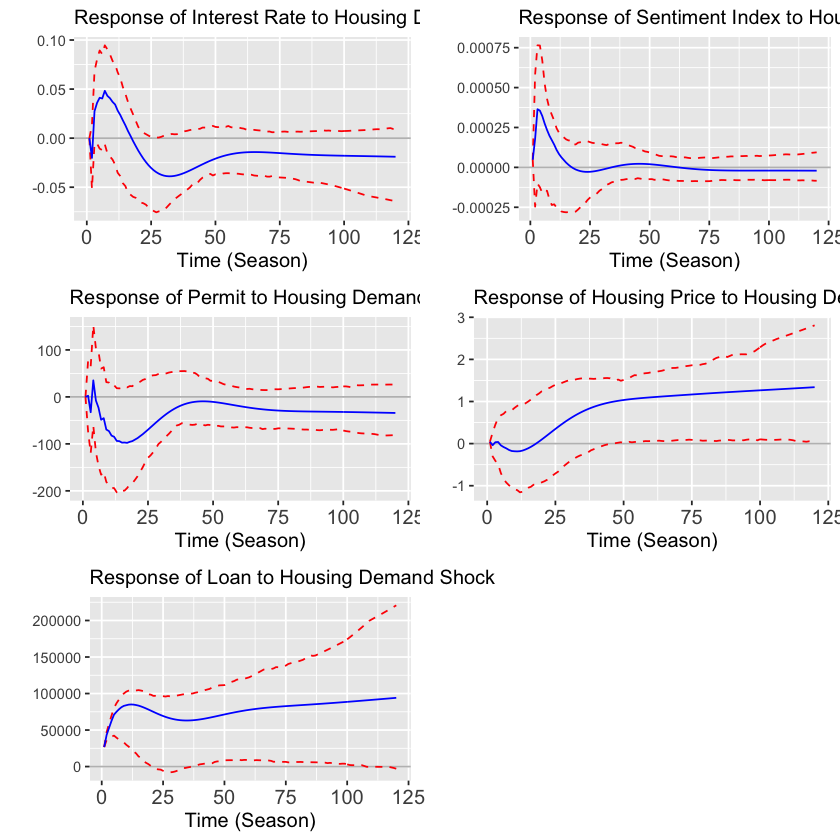

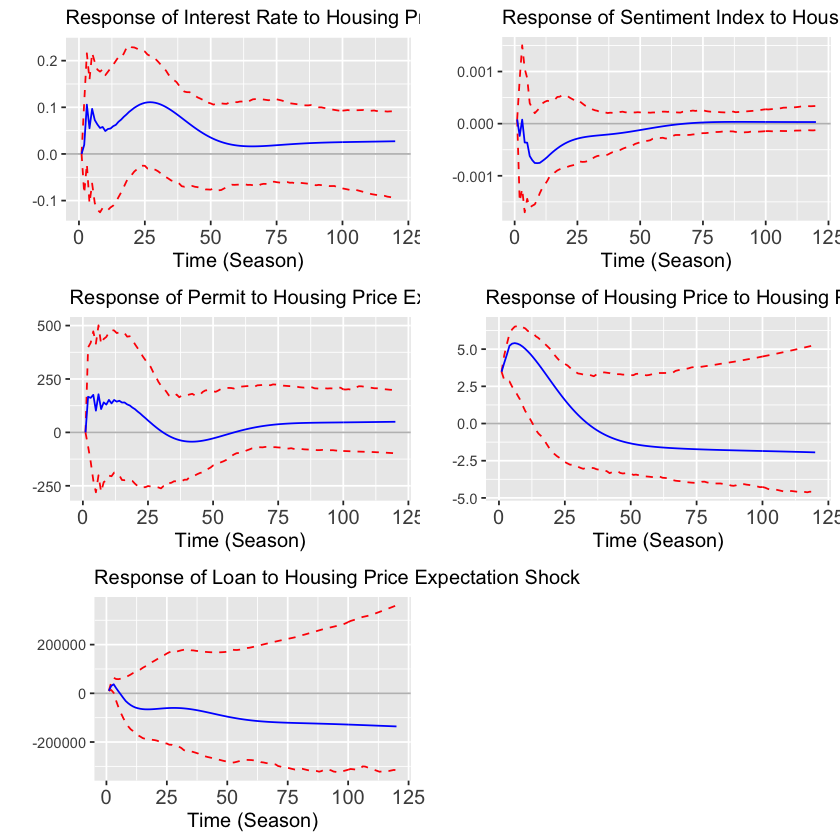

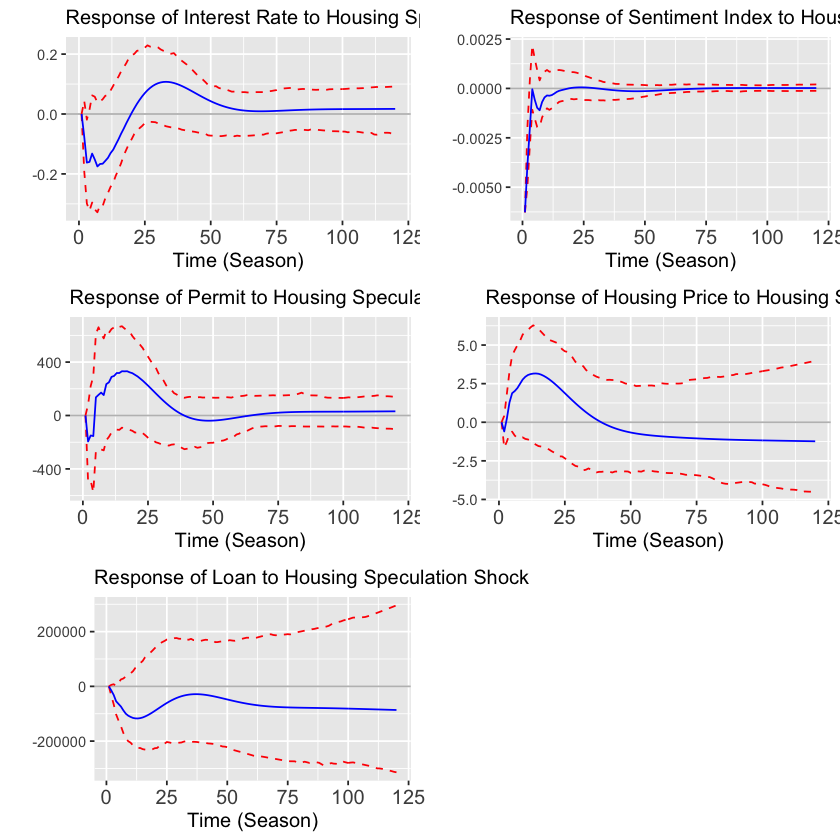

In [23]:
# For shock 1
multiplot(p1,p2,p3,p4,p5,
          cols = 2)
# For shock 2
multiplot(p6,p7,p8,p9,p10,
          cols = 2)
# For shock 3
multiplot(p11,p12,p13,p14,p15,
          cols = 2)
# For shock 4
multiplot(p16,p17,p18,p19,p20,
          cols = 2)
# For shock 5
multiplot(p21,p22,p23,p24,p25,
          cols = 2)

In [24]:
# save plot
# shock 1
ggsave(filename = "result/figure/SVAR_v5i5l4_IRF_shock1.png", 
       plot = multiplot(p1,p2,p3,p4,p5, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

# shock 2
ggsave(filename = "result/figure/SVAR_v5i5l4_IRF_shock2.png", 
       plot = multiplot(p6,p7,p8,p9,p10, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

# shock 3
ggsave(filename = "result/figure/SVAR_v5i5l4_IRF_shock3.png", 
       plot = multiplot(p11,p12,p13,p14,p15, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

# shock 4
ggsave(filename = "result/figure/SVAR_v5i5l4_IRF_shock4.png", 
       plot = multiplot(p16,p17,p18,p19,p20, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

# shock 5
ggsave(filename = "result/figure/SVAR_v5i5l4_IRF_shock5.png", 
       plot = multiplot(p21,p22,p23,p24,p25, cols = 2),
       width = 30, height = 20, units = "cm",
       device = "png")

## Variance Decomposition

In [25]:
# `ddTheta` 放已經估出來的IRF (至於要放怎樣穩定的還要再想)
# m表示對於第幾個變數的變異數分解（如第五個是對房價的變異數分解）
SVAR_AB_VarDecomp <- VAR.svardecomp.AB(m = 5, By, VAR.P,
                                       AMat, BMat, h=120,
                                       Const=TRUE, ddTheta = SVAR_AB_IRF)
tail(SVAR_AB_VarDecomp*100)

h=115,47.66677,11.97912,4.525853,25.96858,9.859687
h=116,47.85595,11.88114,4.555202,25.87841,9.829298
h=117,48.04286,11.78443,4.584180,25.78929,9.799235
h=118,48.22755,11.68897,4.612792,25.70120,9.769495
h=119,48.41005,11.59471,4.641046,25.61412,9.740073
h=120,48.59039,11.50165,4.668948,25.52805,9.710965


In [26]:
# table
SVAR_VD <- (SVAR_AB_VarDecomp*100) %>% as.tibble()
SVAR_VD <- SVAR_VD %>% filter(row_number(V1) %in% c(1,2,4,8,12,20,40,60,80,120)) %>%
    mutate(period = c(1,2,4,8,12,20,40,60,80,120)) %>%
    select(period = period,
           mp = V1,
           hs = V2,
           hd = V3,
           expectation = V4,
           sp = V5) %>%
    mutate(period = as.character(period),
           mp = round(mp, digits = 2),
           hs = round(hs, digits = 2),
           hd = round(hd, digits = 2),
           expectation = round(expectation, digits = 2),
           sp = round(sp, digits = 2))
SVAR_VD

period,mp,hs,hd,expectation,sp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.39,17.74,0.01,79.74,2.12
2,0.40,18.20,0.01,77.32,4.07
4,0.59,18.79,0.01,75.23,5.38
8,1.47,20.52,0.03,69.03,8.96
12,2.55,21.63,0.04,63.46,12.33
20,6.04,23.81,0.03,53.03,17.09
40,19.23,24.62,0.73,39.93,15.49
60,31.35,20.29,2.12,33.57,12.68
80,39.16,16.44,3.21,29.96,11.23


In [28]:
library(xtable)

In [29]:
tab_VD <- xtable(SVAR_VD, caption= "房價指數的變異數分解", align=c("c","c","c","c","c","c","c"))
print(tab_VD, include.rownames=FALSE)

% latex table generated in R 3.6.2 by xtable 1.8-4 package
% Tue Feb  9 16:13:30 2021
\begin{table}[ht]
\centering
\begin{tabular}{cccccc}
  \hline
period & mp & hs & hd & expectation & sp \\ 
  \hline
1 & 0.39 & 17.74 & 0.01 & 79.74 & 2.12 \\ 
  2 & 0.40 & 18.20 & 0.01 & 77.32 & 4.07 \\ 
  4 & 0.59 & 18.79 & 0.01 & 75.23 & 5.38 \\ 
  8 & 1.47 & 20.52 & 0.03 & 69.03 & 8.96 \\ 
  12 & 2.55 & 21.63 & 0.04 & 63.46 & 12.33 \\ 
  20 & 6.04 & 23.81 & 0.03 & 53.03 & 17.09 \\ 
  40 & 19.23 & 24.62 & 0.73 & 39.93 & 15.49 \\ 
  60 & 31.35 & 20.29 & 2.12 & 33.57 & 12.68 \\ 
  80 & 39.16 & 16.44 & 3.21 & 29.96 & 11.23 \\ 
  120 & 48.59 & 11.50 & 4.67 & 25.53 & 9.71 \\ 
   \hline
\end{tabular}
\caption{房價指數的變異數分解} 
\end{table}


In [30]:
print(tab_VD, file="result/table/SVAR_v5i5l4_VD.tex",
      include.rownames=FALSE,
      append=T, table.placement = "h",
      caption.placement="bottom", hline.after=seq(from=-1,to=nrow(tab_VD),by=1))

## Historical Decomposition

In [31]:
SVAR_AB_HistDecomp <- VAR.svarhist.AB(By, VAR.P, Amat, Bmat, CONST)
dim(SVAR_AB_HistDecomp)

[1] 119  25

In [32]:
#----- Base Project 估計 -----#
SVAR_AB_Hist.c0 = VAR.baseproject(By, VAR.P, CONST)
head(SVAR_AB_Hist.c0)
dim(SVAR_AB_Hist.c0)
dim(By)

1,7.180000,10465.00,1658483,0.005097271,98.1600
2,8.270000,17129.00,1728606,0.015780528,104.1600
3,7.766667,17332.00,1848549,0.016126075,106.6800
4,6.022667,20174.00,1965070,0.018451218,109.9900
,6.569042,17897.65,2110570,0.017517447,111.3490
,6.609205,20076.52,2294858,0.016701628,113.5949


[1] 119   5

[1] 119   5

In [33]:
# 實際時間序列與基本預測時間序列之偏離值
head(By-SVAR_AB_Hist.c0)

,interest_rate,permit,loan,Sentiment,hp
1,0.0000000,0.000,0.000,0.0000000000,0.000000
2,0.0000000,0.000,0.000,0.0000000000,0.000000
3,0.0000000,0.000,0.000,0.0000000000,0.000000
4,0.0000000,0.000,0.000,0.0000000000,0.000000
5,-0.1957088,1392.347,-1344.757,-0.0043687939,1.860992
6,1.1094620,4635.480,-91734.336,0.0006696575,4.225128


In [34]:
# 只有特定衝擊下的時間序列與基本預測時間序列之偏離值
## shock1: monetary policy shock
head(SVAR_AB_HistDecomp[,c(1,6,11,16,21)])

NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
-0.1957088,-88.00263,-1233.355,-0.0003028333,-0.2000588
1.1574482,505.77879,1198.083,0.0021726856,1.2053049


In [35]:
##左：baseline上 hp 的變化；右：shock1 對 hp 的衝擊
cbind((By-SVAR_AB_Hist.c0)[,5], 
      (SVAR_AB_HistDecomp[,c(1,6,11,16,21)])[,5])

1,0.000000,NA
2,0.000000,NA
3,0.000000,NA
4,0.000000,NA
5,1.860992,-0.2000588418
6,4.225128,1.2053048983
7,5.542659,0.3738311686
8,4.704711,-0.9471588556
9,3.981116,-0.4028349693
10,1.707900,-0.4365466592
11,9.593927,-1.9305469959


### 對「房價」的歷史分解：monetary policy shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



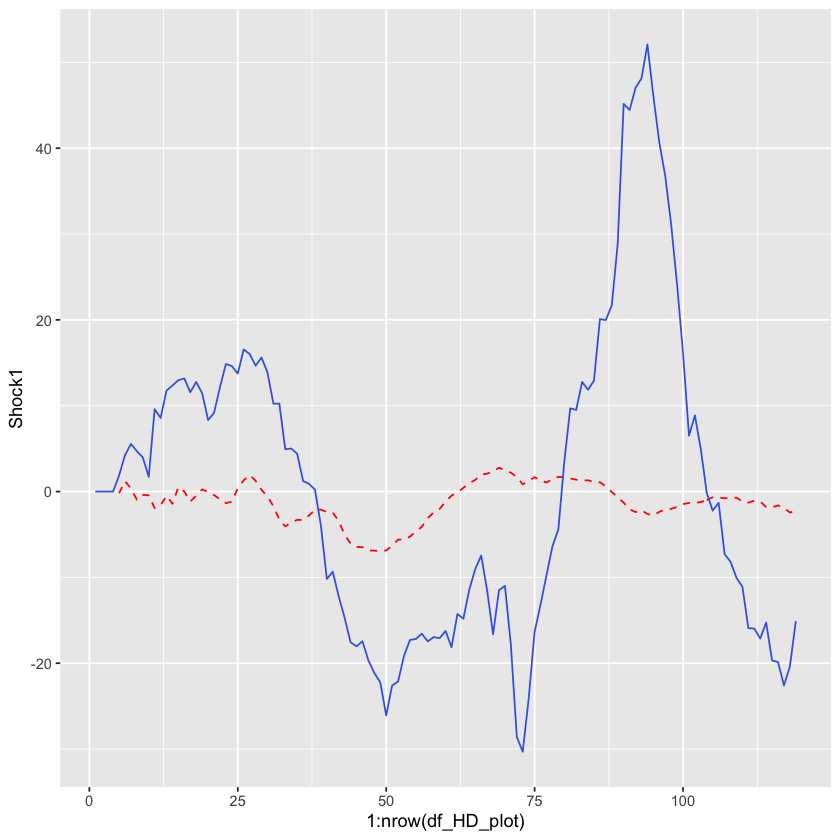

In [36]:
df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,5],
                        (SVAR_AB_HistDecomp[,c(1,6,11,16,21)])[,5])
colnames(df_HD_plot) <- c("BaseLine", "Shock1")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock1), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')


### 對「房價」的歷史分解：supply shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



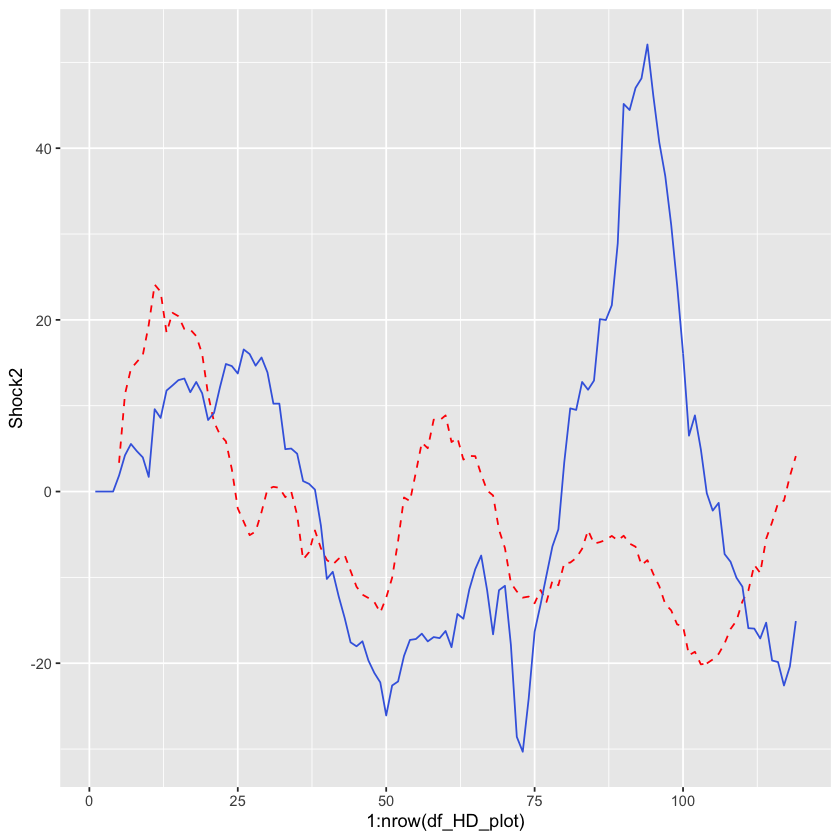

In [37]:
# ## shock2: housing price expectation shock
# SVAR_AB_HistDecomp[,c(2,7,12,17,22)]-SVAR_AB_Hist.c0
# ## baseline上 hp 的變化
# (By-SVAR_AB_Hist.c0)[,5]
# ## shock2 對 hp 的衝擊
# (SVAR_AB_HistDecomp[,c(2,7,12,17,22)])[,5]

df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,5],
                        (SVAR_AB_HistDecomp[,c(2,7,12,17,22)])[,5])
colnames(df_HD_plot) <- c("BaseLine", "Shock2")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock2), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### 對「房價」的歷史分解：demand shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



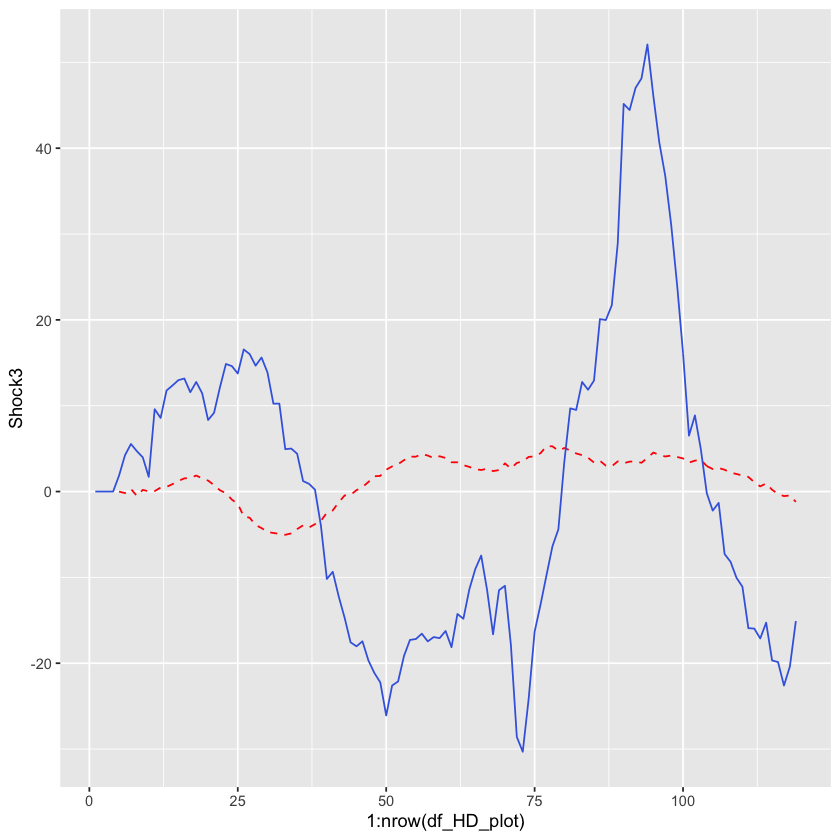

In [38]:
# ## shock3: supply shock
# SVAR_AB_HistDecomp[,c(3,8,13,18,23)]-SVAR_AB_Hist.c0
# ## baseline上 hp 的變化
# (By-SVAR_AB_Hist.c0)[,5]
# ## shock3 對 hp 的衝擊
# (SVAR_AB_HistDecomp[,c(3,8,13,18,23)])[,5]

df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,5],
                        (SVAR_AB_HistDecomp[,c(3,8,13,18,23)])[,5])
colnames(df_HD_plot) <- c("BaseLine", "Shock3")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock3), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### 對「房價」的歷史分解：housing price expectation shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



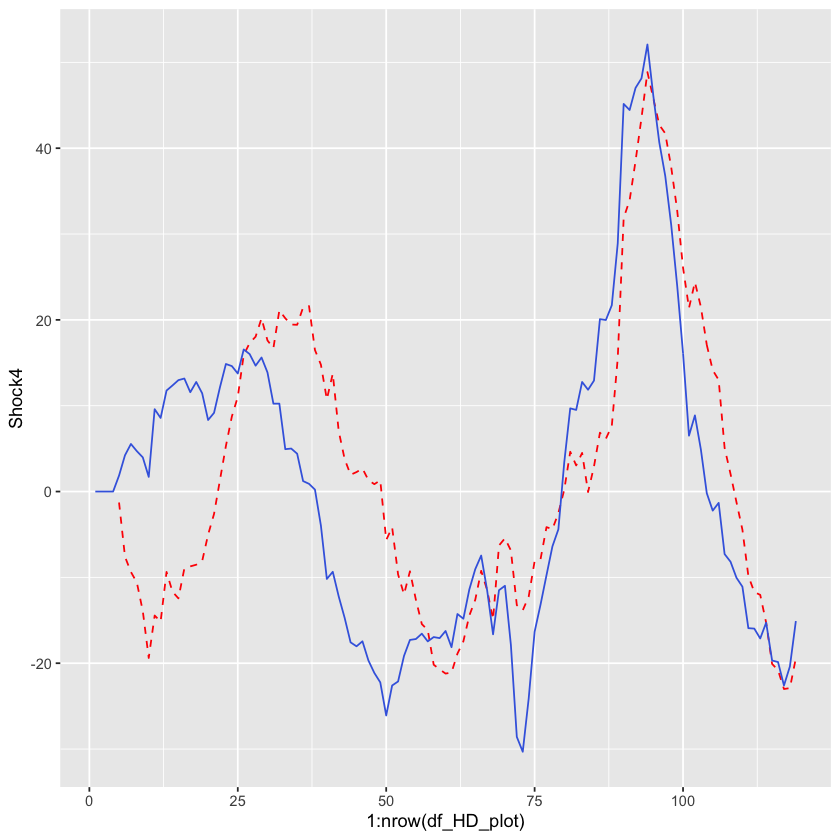

In [39]:
# ## shock4: demand shock
# SVAR_AB_HistDecomp[,c(4,9,14,19,24)]-SVAR_AB_Hist.c0
# ## baseline上 hp 的變化
# (By-SVAR_AB_Hist.c0)[,5]
# ## shock4 對 hp 的衝擊
# (SVAR_AB_HistDecomp[,c(4,9,14,19,24)])[,5]

df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,5],
                        (SVAR_AB_HistDecomp[,c(4,9,14,19,24)])[,5])
colnames(df_HD_plot) <- c("BaseLine", "Shock4")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock4), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### 對「房價」的歷史分解：housing speculation shock對房價的解釋力

New names:
* NA -> ...1
* NA -> ...2



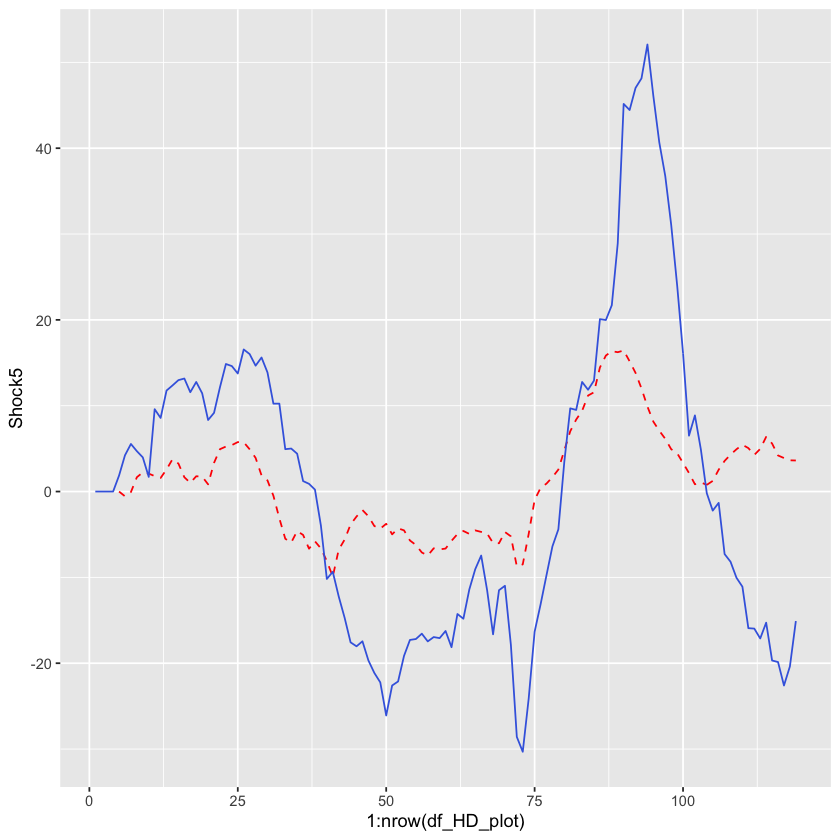

In [40]:
## shock5: housing speculation shock
#SVAR_AB_HistDecomp[,c(5,10,15,20,25)]-SVAR_AB_Hist.c0
## baseline上 hp 的變化
#(By-SVAR_AB_Hist.c0)[,5]
## shock5 對 hp 的衝擊
#(SVAR_AB_HistDecomp[,c(5,10,15,20,25)])[,5]

df_HD_plot <- bind_cols((By-SVAR_AB_Hist.c0)[,5],
                        (SVAR_AB_HistDecomp[,c(5,10,15,20,25)])[,5])
colnames(df_HD_plot) <- c("BaseLine", "Shock5")
ggplot(df_HD_plot)+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = Shock5), col = 'red', linetype = "dashed")+
  geom_line(aes(x = 1:nrow(df_HD_plot), y = BaseLine), col = 'royalblue')

### Table

In [41]:
t_label <- c()
year_label <- c()
season_label <- c()
year <- 1991
for(q in 1:119){
    if(q%%4==0){
        t_label <- c(t_label, paste0(year, "Q4", sep = ""))
        year_label <- c(year_label, year)
        season_label <- c(season_label, 4)
        year <- year+1
    }else{
        t_label <- c(t_label, paste0(year, "Q", q%%4, sep = ""))
        year_label <- c(year_label, year)
        season_label <- c(season_label, q%%4)
    }
}

In [42]:
df_HD <- bind_cols(t_label,
                   year_label,
                   season_label,
                   (By-SVAR_AB_Hist.c0)[,5],
                   SVAR_AB_HistDecomp[,21],
                   SVAR_AB_HistDecomp[,22],
                   SVAR_AB_HistDecomp[,23],
                   SVAR_AB_HistDecomp[,24],
                   SVAR_AB_HistDecomp[,25])
colnames(df_HD) <- c("Time", "Year", "Season", "BaseLine", "mp", "hs", "hd", "expectation", "sp")
tail(df_HD)

New names:
* NA -> ...1
* NA -> ...2
* NA -> ...3
* NA -> ...4
* NA -> ...5
* ...



Time,Year,Season,BaseLine,mp,hs,hd,expectation,sp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019Q2,2019,2,-15.27653,-1.799739,-5.507270,0.9412248,-15.28211,6.371368
2019Q3,2019,3,-19.68459,-1.831331,-3.576656,0.2102571,-20.07916,5.592305
2019Q4,2019,4,-19.86183,-1.619142,-1.351338,-0.2849527,-20.80860,4.202198
2020Q1,2020,1,-22.59831,-1.897954,-1.066606,-0.5317635,-23.00679,3.904806
2020Q2,2020,2,-20.37406,-2.445183,1.791965,-0.4579437,-22.90014,3.637243
2020Q3,2020,3,-15.08912,-2.232648,4.133154,-1.2005064,-19.40642,3.617301


In [43]:
# 全樣本
HD_seq1 <- df_HD %>% summarise(Time = Time,
                    Year = Year,
                    Season = Season,
                    mp = mp/BaseLine*100,
                    hs = hs/BaseLine*100,
                    hd = hd/BaseLine*100,
                    expectation = expectation/BaseLine*100,
                    sp = sp/BaseLine*100) %>%
drop_na() %>%
summarise(mp = median(mp),
          hs = median(hs),
          hd = median(hd),
          expectation = median(expectation),
          sp = median(sp))

# 房價持平期
HD_seq2 <- df_HD %>% summarise(Time = Time,
                    Year = Year,
                    Season = Season,
                    mp = mp/BaseLine*100,
                    hs = hs/BaseLine*100,
                    hd = hd/BaseLine*100,
                    expectation = expectation/BaseLine*100,
                    sp = sp/BaseLine*100) %>%
drop_na() %>%
filter(Year<2003) %>%
summarise(mp = median(mp),
          hs = median(hs),
          hd = median(hd),
          expectation = median(expectation),
          sp = median(sp))

# 房價上升期
HD_seq3 <- df_HD %>% summarise(Time = Time,
                    Year = Year,
                    Season = Season,
                    mp = mp/BaseLine*100,
                    hs = hs/BaseLine*100,
                    hd = hd/BaseLine*100,
                    expectation = expectation/BaseLine*100,
                    sp = sp/BaseLine*100) %>%
drop_na() %>%
filter(Year>=2003) %>%
summarise(mp = median(mp),
          hs = median(hs),
          hd = median(hd),
          expectation = median(expectation),
          sp = median(sp))

In [44]:
HD_seq <- bind_rows(HD_seq1, HD_seq2, HD_seq3)
HD.table <- bind_cols(c("全樣本(1991Q1-2020Q3)","房價持平期(1991Q1-2002Q4)","房價上升期(2003Q1-2020Q3)"), HD_seq)
colnames(HD.table) <- c("樣本期間", 
                        "Montary Policy Shock", 
                        "Housing Supply Shock",
                        "Housing Demand Shock",
                        "Housing Price Expectation Shock",
                        "Housing Speculation Shock")
HD.table

New names:
* NA -> ...1



樣本期間,Montary Policy Shock,Housing Supply Shock,Housing Demand Shock,Housing Price Expectation Shock,Housing Speculation Shock
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
全樣本(1991Q1-2020Q3),-0.006322254,6.803692,-6.1612473,53.74270,21.67759
房價持平期(1991Q1-2002Q4),-3.923967460,63.518818,-0.7207993,-20.53498,18.61998
房價上升期(2003Q1-2020Q3),3.039289737,-13.055876,-11.6245798,70.33025,23.61279


In [45]:
# 生出table
tab_HD <- xtable(HD.table, caption= "歷史分解下各衝擊的解釋力比率(%)", align=c("c","c","c","c","c","c","c"))
print(tab_HD, include.rownames=FALSE)

% latex table generated in R 3.6.2 by xtable 1.8-4 package
% Tue Feb  9 16:13:38 2021
\begin{table}[ht]
\centering
\begin{tabular}{cccccc}
  \hline
樣本期間 & Montary Policy Shock & Housing Supply Shock & Housing Demand Shock & Housing Price Expectation Shock & Housing Speculation Shock \\ 
  \hline
全樣本(1991Q1-2020Q3) & -0.01 & 6.80 & -6.16 & 53.74 & 21.68 \\ 
  房價持平期(1991Q1-2002Q4) & -3.92 & 63.52 & -0.72 & -20.53 & 18.62 \\ 
  房價上升期(2003Q1-2020Q3) & 3.04 & -13.06 & -11.62 & 70.33 & 23.61 \\ 
   \hline
\end{tabular}
\caption{歷史分解下各衝擊的解釋力比率(%)} 
\end{table}


In [46]:
print(tab_HD, include.rownames=FALSE,
      file="result/table/SVAR_v5i5l4_HD.tex",
      append=T, table.placement = "h",
      caption.placement="bottom", hline.after=seq(from=-1,to=nrow(tab_HD),by=1))

### Save Plot

In [47]:
xlab <- lubridate::yq(df_HD$Time)

In [48]:
# plot 1
figure_HD.1 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = mp, color = "Monetary Policy Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Monetary Policy Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('royalblue','red'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

# plot 2
figure_HD.2 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = hs, color = "Housing Supply Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Housing Supply Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('red','royalblue'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

# plot 3
figure_HD.3 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = hd, color = "Housing Demand Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Housing Demand Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('red','royalblue'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())


# plot 4
figure_HD.4 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = expectation, color = "Housing Price Expectation Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Housing Price Expectation Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('red','royalblue'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

# plot 5
figure_HD.5 <- df_HD %>%
    ggplot()+
    geom_line(aes(x = xlab, y = sp, color = "Housing Speculation Shock"), linetype = "dashed")+
    geom_line(aes(x = xlab, y = BaseLine, color = "HP Deviations from Base Projection"))+
    labs(x = '',
         y = '',
         title = 'Historical Decomposition of hp: Housing Speculation Shock')+
    Text_Size_Theme+
    scale_color_manual(values=c('red','royalblue'))+
    theme(legend.position="bottom", 
          legend.direction="vertical",
          legend.title = element_blank())

In [49]:
# save shock 1
ggsave(filename = "result/figure/SVAR_v5i5l4_HD_shock1.png", 
       plot = figure_HD.1,
       width = 15, height = 10, units = "cm",
       device = "png")

# save shock 2
ggsave(filename = "result/figure/SVAR_v5i5l4_HD_shock2.png", 
       plot = figure_HD.2,
       width = 15, height = 10, units = "cm",
       device = "png")

# save shock 3
ggsave(filename = "result/figure/SVAR_v5i5l4_HD_shock3.png", 
       plot = figure_HD.3,
       width = 15, height = 10, units = "cm",
       device = "png")

# save shock 4
ggsave(filename = "result/figure/SVAR_v5i5l4_HD_shock4.png", 
       plot = figure_HD.4,
       width = 15, height = 10, units = "cm",
       device = "png")

# save shock 5
ggsave(filename = "result/figure/SVAR_v5i5l4_HD_shock5.png", 
       plot = figure_HD.5,
       width = 15, height = 10, units = "cm",
       device = "png")